In [0]:
! pip install visdom

In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader
import torchvision
from torch.autograd import Variable

In [2]:
%%time
batch_size = 256
T=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
## Downloading Train dataset
train = torchvision.datasets.MNIST('/file/',train=True,download =True,transform = T)
train = torch.utils.data.DataLoader(train,batch_size = batch_size,shuffle=True)


## Downloading Test dataset
test = torchvision.datasets.MNIST('/file/',train=False,download =True,transform = T)
test = torch.utils.data.DataLoader(test,batch_size = batch_size ,shuffle=True)

print()


CPU times: user 2.98 ms, sys: 36.8 ms, total: 39.7 ms
Wall time: 40.1 ms


In [3]:
# 0 is a index
# 256 is our batch size
#  1*28*28 is a single image

for index,(images,labels) in enumerate(train):
  print(index,images.size(),len(labels))
  break ## for single example

0 torch.Size([256, 1, 28, 28]) 256


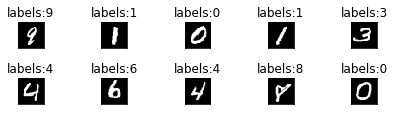

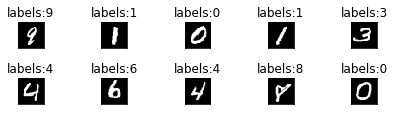

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()

for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0],cmap = 'gray',interpolation = 'none')
  plt.title('labels:{}'.format(labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [5]:
### Flattening of images
images.view(-1,28*28).size()

torch.Size([256, 784])

In [0]:
## Feed Forward Neural Network on MNIST dataset

class Mnet_FNN(nn.Module):
  def __init__(self,inputsize,hiddensize1,hiddensize2,output):
    super(Mnet_FNN,self).__init__()
    self.fc1 = nn.Linear(inputsize,hiddensize1)
    self.fc2 = nn.Linear(hiddensize1,hiddensize2)
    self.fc3= nn.Linear(hiddensize2,output)

  def forward(self,x):
    '''
     Currently size of image is 256, 1, 28, 28 with view we will flatten it out and change it to batch_size and 28*28
     -1 give is the batch size that we put.
    '''
    ## Flattening
    x = images.view(-1,28*28)
    ## 1st pass
    x = self.fc1(x)
    x = torch.relu(x)

    ## 2nd pass
    x = self.fc2(x)
    x = torch.relu(x)

    ## Final pass
    out = self.fc3(x)
    

    return out

In [7]:
model_FNN=Mnet_FNN(28*28,100,50,10)
print('Archeitecture of Model\n',model_FNN)

Archeitecture of Model
 Mnet_FNN(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)


In [8]:
%%time
loss_ = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_FNN.parameters() , lr = .001)

n_epochs = 50
steps = 0
print_every = 50

lossess = list()
for epoch in range(n_epochs):
  for index,(images,labels) in enumerate(train):
    images = Variable(images)
    labels = Variable(labels)
    output = model_FNN(images)

    model_FNN.zero_grad()
    loss = loss_(output,labels)
    loss.backward()

    optimizer.step()

  if epoch % 5 == 0:
    lossess.append( loss.item())

    print('Epoch: {} - Loss: {:.6f}'.format(epoch + 1, loss.item()))

Epoch: 1 - Loss: 0.308166
Epoch: 6 - Loss: 0.133034
Epoch: 11 - Loss: 0.015221
Epoch: 16 - Loss: 0.008804
Epoch: 21 - Loss: 0.018363
Epoch: 26 - Loss: 0.005111
Epoch: 31 - Loss: 0.001389
Epoch: 36 - Loss: 0.001702
Epoch: 41 - Loss: 0.000505
Epoch: 46 - Loss: 0.000380
CPU times: user 4min 40s, sys: 1.14 s, total: 4min 41s
Wall time: 4min 42s


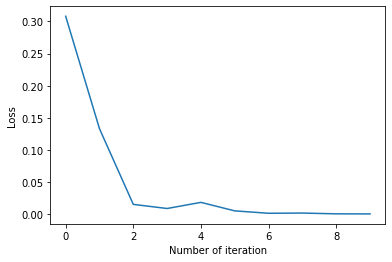

In [9]:
#visualization
plt.plot(lossess)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.show()